In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df1 = pd.read_csv("./data/gct_20250824_211810/gct_20250824_211810_total.csv")
df1

,tile_idx,lat,lng,id,bicycle_id,scooter_number,region_id,region_name,is_activated,battery,gcooter_status,is_discount_scooter,model_info_id,model_info_name,movable_distance_value,movable_distance_unit,movable_distance_display_value,collected_time
0,1,37.500503,127.062787,79225,79225.0,617227.0,560,(본사직영)_서울_강남_대치,True,63.0,IDLE,False,18.0,GCOO-B2,18.0,km,18km,2025-08-24 21:18:11
1,1,37.499793,127.066016,89944,89944.0,608040.0,560,(본사직영)_서울_강남_대치,True,26.0,IDLE,False,18.0,GCOO-B2,7.0,km,7km,2025-08-24 21:18:11
2,1,37.505855,127.054810,80098,80098.0,616167.0,557,(본사직영)_서울_강남_삼성,True,56.0,IDLE,False,18.0,GCOO-B2,16.0,km,16km,2025-08-24 21:18:11
3,1,37.495239,127.053140,106138,106138.0,623053.0,560,(본사직영)_서울_강남_대치,True,55.0,IDLE,False,18.0,GCOO-B2,16.0,km,16km,2025-08-24 21:18:11
4,1,37.497746,127.055042,91621,91621.0,612991.0,560,(본사직영)_서울_강남_대치,True,73.0,IDLE,True,18.0,GCOO-B2,21.0,km,21km,2025-08-24 21:18:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943347,119,37.472501,126.963108,117860,117860.0,638103.0,961,(본사직영)_서울_관악,True,53.0,IDLE,False,18.0,GCOO-B2,15.0,km,15km,2025-08-24 23:36:05
943348,119,37.477570,126.972465,118253,118253.0,638885.0,962,(본사직영)_서울_동작,True,75.0,IDLE,False,18.0,GCOO-B2,22.0,km,22km,2025-08-24 23:36:05
943349,119,37.473370,126.968801,118334,118334.0,638148.0,961,(본사직영)_서울_관악,True,88.0,IDLE,False,18.0,GCOO-B2,26.0,km,26km,2025-08-24 23:36:05
943350,119,37.472681,126.964256,117713,117713.0,638198.0,961,(본사직영)_서울_관악,True,61.0,IDLE,False,18.0,GCOO-B2,18.0,km,18km,2025-08-24 23:36:05


In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943352 entries, 0 to 943351
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tile_idx                        943352 non-null  int64  
 1   lat                             943352 non-null  float64
 2   lng                             943352 non-null  float64
 3   id                              943352 non-null  object 
 4   bicycle_id                      933433 non-null  float64
 5   scooter_number                  933433 non-null  float64
 6   region_id                       943352 non-null  int64  
 7   region_name                     943352 non-null  object 
 8   is_activated                    933433 non-null  object 
 9   battery                         933433 non-null  float64
 10  gcooter_status                  933433 non-null  object 
 11  is_discount_scooter             933433 non-null  object 
 12  model_info_id   

## id의 discount_spots 가 무엇인가?
- 확인 결과 scooter_number가 모두 없으므로 기기가 아님을 확인 -> 삭제 (실제로 ‘지쿠 파킹존’ 임. 200원 할인 혜택)

In [125]:
df1[df1['id'].astype(str).str.contains('discount', case=False)][['id','scooter_number']].sort_values(by='id')

,id,scooter_number
836975,discount_spots_7406,NaN
706853,discount_spots_7406,NaN
418322,discount_spots_7406,NaN
141777,discount_spots_7406,NaN
106378,discount_spots_7406,NaN
...,...,...
689451,discount_spots_8225,NaN
424527,discount_spots_8225,NaN
165690,discount_spots_8225,NaN
71240,discount_spots_8225,NaN


In [126]:
# 전체 종류수
df1[df1['id'].astype(str).str.contains('discount', case=False)][['id','scooter_number']].nunique()

id                62
scooter_number     0
dtype: int64

In [127]:
df1['id'].nunique()

6101

In [128]:
# df2: discount_spots 로 시작하는 id들 삭제
df2 = df1[~df1['id'].astype(str).str.contains('discount', case=False)].reset_index(drop=True)
df2.to_csv("./data/gct_20250824_211810/mid/gct_df2.csv", index=False)
df2

,tile_idx,lat,lng,id,bicycle_id,scooter_number,region_id,region_name,is_activated,battery,gcooter_status,is_discount_scooter,model_info_id,model_info_name,movable_distance_value,movable_distance_unit,movable_distance_display_value,collected_time
0,1,37.500503,127.062787,79225,79225.0,617227.0,560,(본사직영)_서울_강남_대치,True,63.0,IDLE,False,18.0,GCOO-B2,18.0,km,18km,2025-08-24 21:18:11
1,1,37.499793,127.066016,89944,89944.0,608040.0,560,(본사직영)_서울_강남_대치,True,26.0,IDLE,False,18.0,GCOO-B2,7.0,km,7km,2025-08-24 21:18:11
2,1,37.505855,127.054810,80098,80098.0,616167.0,557,(본사직영)_서울_강남_삼성,True,56.0,IDLE,False,18.0,GCOO-B2,16.0,km,16km,2025-08-24 21:18:11
3,1,37.495239,127.053140,106138,106138.0,623053.0,560,(본사직영)_서울_강남_대치,True,55.0,IDLE,False,18.0,GCOO-B2,16.0,km,16km,2025-08-24 21:18:11
4,1,37.497746,127.055042,91621,91621.0,612991.0,560,(본사직영)_서울_강남_대치,True,73.0,IDLE,True,18.0,GCOO-B2,21.0,km,21km,2025-08-24 21:18:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933428,119,37.472501,126.963108,117860,117860.0,638103.0,961,(본사직영)_서울_관악,True,53.0,IDLE,False,18.0,GCOO-B2,15.0,km,15km,2025-08-24 23:36:05
933429,119,37.477570,126.972465,118253,118253.0,638885.0,962,(본사직영)_서울_동작,True,75.0,IDLE,False,18.0,GCOO-B2,22.0,km,22km,2025-08-24 23:36:05
933430,119,37.473370,126.968801,118334,118334.0,638148.0,961,(본사직영)_서울_관악,True,88.0,IDLE,False,18.0,GCOO-B2,26.0,km,26km,2025-08-24 23:36:05
933431,119,37.472681,126.964256,117713,117713.0,638198.0,961,(본사직영)_서울_관악,True,61.0,IDLE,False,18.0,GCOO-B2,18.0,km,18km,2025-08-24 23:36:05


In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933433 entries, 0 to 933432
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tile_idx                        933433 non-null  int64  
 1   lat                             933433 non-null  float64
 2   lng                             933433 non-null  float64
 3   id                              933433 non-null  object 
 4   bicycle_id                      933433 non-null  float64
 5   scooter_number                  933433 non-null  float64
 6   region_id                       933433 non-null  int64  
 7   region_name                     933433 non-null  object 
 8   is_activated                    933433 non-null  object 
 9   battery                         933433 non-null  float64
 10  gcooter_status                  933433 non-null  object 
 11  is_discount_scooter             933433 non-null  object 
 12  model_info_id   

In [138]:
df2['id'].value_counts()

id
77495     160
91758     160
97604     160
81330     160
105423    160
         ... 
81988       8
41013       6
67548       5
93975       4
100836      4
Name: count, Length: 6039, dtype: int64

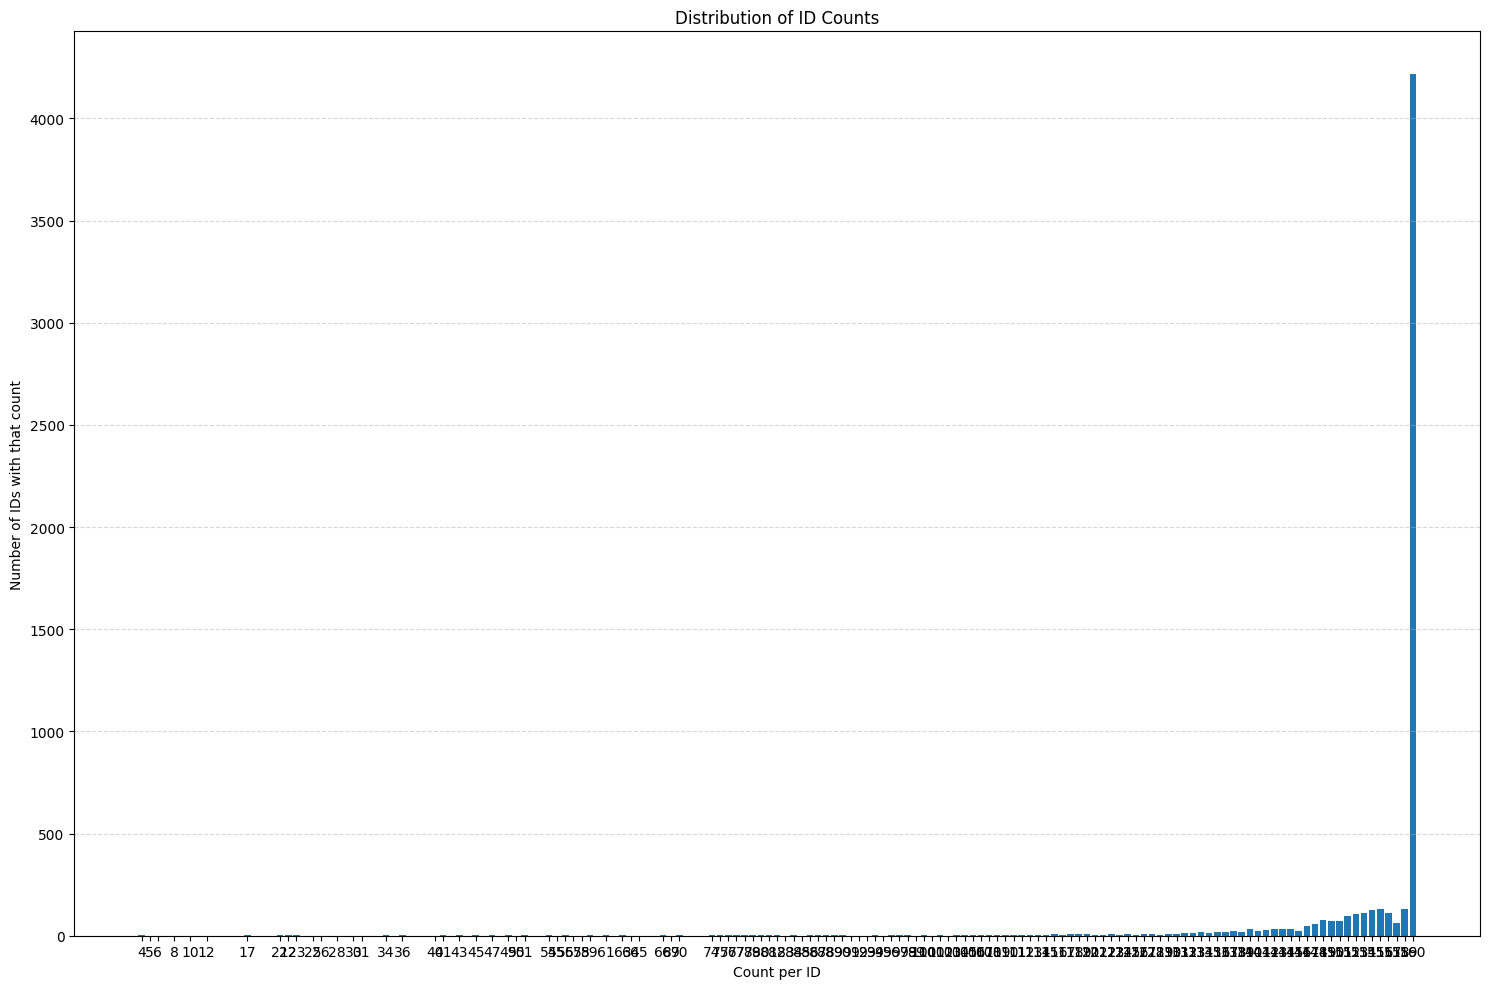

In [139]:
# id별 count
count_df = df2['id'].value_counts().reset_index(name='count')
count_distribution = count_df['count'].value_counts().sort_index()

plt.figure(figsize=(15, 10))
plt.bar(count_distribution.index, count_distribution.values)
plt.xlabel('Count per ID')
plt.ylabel('Number of IDs with that count')
plt.title('Distribution of ID Counts')
plt.xticks(count_distribution.index)  # x축 눈금 정렬
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [140]:
# df3: 시계열 visualize용 id, timestamp, lat, lon 열만 남기기
df3 = df2[['id', 'collected_time', 'lat', 'lng']].copy()
df3.columns = ['id', 'timestamp', 'lat', 'lon']
df3 = df3.sort_values(['id', 'timestamp'])
df3.to_csv("./data/gct_20250824_211810/mid/gct_df3.csv", index=False)
df3

### 움직인 애들만 추출하기

In [142]:
# df4: id별 unique한 타임스탠프의 첫행만 남겨놓음
mask4 = (df3['id'] == df3['id'].shift()) & \
       (df3['lat'] == df3['lat'].shift()) & \
       (df3['lon'] == df3['lon'].shift())

df4 = df3[~mask4].reset_index(drop=True)
df4.to_csv("./data/gct_20250824_211810/mid/gct_df4.csv", index=False)
df4

723       False
6531       True
12340      True
18146      True
23950      True
          ...  
905422     True
911289     True
917142     True
922997     True
928863     True
Length: 933433, dtype: bool

In [93]:
# df5: id별 unique한 타임스탬프의 첫행과 마지막행만 남겨놓음
mask5_prev = (
    (df3['id'] == df3['id'].shift()) &
    (df3['lat'] == df3['lat'].shift()) &
    (df3['lon'] == df3['lon'].shift())
)

mask5_next = (
    (df3['id'] == df3['id'].shift(-1)) &
    (df3['lat'] == df3['lat'].shift(-1)) &
    (df3['lon'] == df3['lon'].shift(-1))
)

redundant_middle = mask5_prev & mask5_next

df5 = df3[~redundant_middle].reset_index(drop=True)
df5.to_csv("./data/gct_20250824_211810/mid/gct_df5.csv", index=False)
df5

In [101]:
df6 = df4.groupby('id').size().sort_values(ascending=False)

df6.to_csv("./data/gct_20250824_211810/mid/gct_df6.csv", index=False)
df6

id
118927                 20
119056                 20
85583                  20
118128                 19
87034                  19
                       ..
48264                   1
48262                   1
48220                   1
65029                   1
discount_spots_8225     1
Length: 6101, dtype: int64